In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('train.csv').to_numpy()

X = data[:, 1:] / 255.0  
Y = data[:, 0]           

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
Y_val = torch.tensor(Y_val, dtype=torch.long)

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  
        self.fc2 = nn.Linear(128, 10)   

    def forward(self, x):
        x = torch.relu(self.fc1(x))   
        x = self.fc2(x)               
        return x  


In [5]:
model = SimpleNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


In [6]:
def train_model(model, criterion, optimizer, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()  
        running_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad() 

            outputs = model(inputs)  
            loss = criterion(outputs, labels)  
            loss.backward()  
            optimizer.step() 

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

        
        model.eval()  
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Validation Accuracy: {accuracy:.4f}')

train_model(model, criterion, optimizer, train_loader, val_loader)


Epoch 1/10, Loss: 0.4273
Validation Accuracy: 0.9250
Epoch 2/10, Loss: 0.2118
Validation Accuracy: 0.9396
Epoch 3/10, Loss: 0.1551
Validation Accuracy: 0.9526
Epoch 4/10, Loss: 0.1226
Validation Accuracy: 0.9570
Epoch 5/10, Loss: 0.1003
Validation Accuracy: 0.9625
Epoch 6/10, Loss: 0.0837
Validation Accuracy: 0.9650
Epoch 7/10, Loss: 0.0711
Validation Accuracy: 0.9685
Epoch 8/10, Loss: 0.0621
Validation Accuracy: 0.9675
Epoch 9/10, Loss: 0.0538
Validation Accuracy: 0.9687
Epoch 10/10, Loss: 0.0473
Validation Accuracy: 0.9706


Prediction: 8, Label: 8


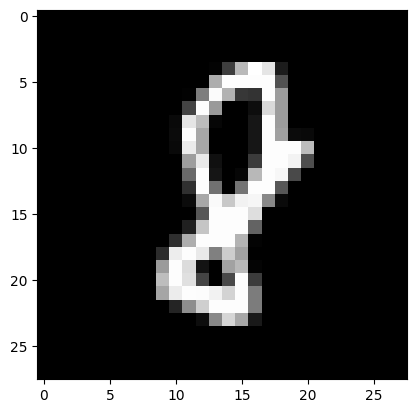

In [7]:
def test_prediction(index, X_val, Y_val, model):
    model.eval()  
    with torch.no_grad():
        image = X_val[index]
        label = Y_val[index].item()
        output = model(image.unsqueeze(0)) 
        _, predicted = torch.max(output.data, 1)
        prediction = predicted.item()

    print(f"Prediction: {prediction}, Label: {label}")

    image = image.reshape(28, 28) * 255  
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()

test_prediction(0, X_val, Y_val, model)
